In [1]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


um=1e-6
mm=1e-3
nm=1e-9
cm=1e-2
dx=dy=1*um
wavelength=650*nm
k=2*np.pi/wavelength


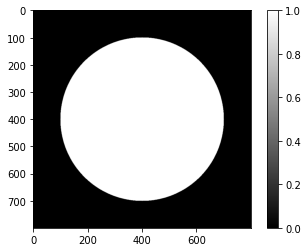

In [2]:
#Apertura circular
mask=np.zeros((800,800),dtype="uint8")
#cv2.line(mask,(600,700),(77,70),1,2)
#cv2.line(mask,(600,700),(600,400),0,2)
cv2.circle(mask,(400,400),300,1,-1)
plt.imshow(mask,cmap="gray")
plt.colorbar()
plt.show()
np.size(mask)

U_0=mask

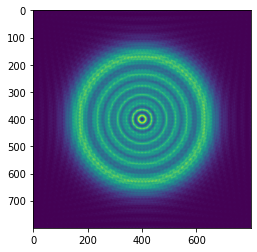

In [3]:
#espectro inicial
z=1*cm
A_0=np.fft.fftshift(np.fft.fft2(U_0))
N,M= np.shape(U_0)
x=np.arange(-int(N/2),int(N/2),1)
y=np.arange(-int(M/2),int(M/2),1)
X, Y=np.meshgrid(x,y)

#dimensiones de mundo en frecuencias
fx=X*(1/(N*dx))
fy=Y*(1/(M*dy))

#transferencia
H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
A_z=A_0*H
U_z=np.fft.ifft2(A_z)
plt.imshow(np.abs(U_z)**2)

Máxima distancia de propagación aceptable: 0.0012307692307692308 metros o 0.12307692307692308 centímetros


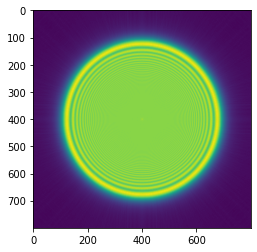

In [13]:
# ESPECTRO ANGULAR POR FFT
def AngFT(entrada, z, del_x, del_y, wave_length):
    
    k = 2*np.pi/wave_length
    M, N = np.shape(entrada)

    dist = M*del_x**2/wave_length
    if z <= dist:
        # Dimensiones longitudinales de la imagen
        Lx = del_x*N
        Ly = del_y*M
        # Tamaño muestral en las frecuencias
        del_fx = 1/Lx
        del_fy = 1/Ly
        
        if N%2==0:
            x = np.arange(-int(N/2),int(N/2),1)
        else:
            x = np.arange(-int(N/2),int(N/2)+1,1)

        if M%2==0:
            y = np.arange(-int(M/2),int(M/2),1)
        else:
            y = np.arange(-int(M/2),int(M/2)+1,1)
        
        #x = np.arange(N)
        #y = np.arange(M)
        p, q = np.meshgrid(x,y)
        fx = p*del_fx
        fy = q*del_fy
        
        # espectro angular en el plano de entrada
        A_0 = np.fft.fftshift(np.fft.fft2(entrada)) #np.fft.fft2(entrada) #
        ker = np.exp(1j*z*k*np.emath.sqrt(1 - (wave_length**2)*(fx**2+fy**2) )  )
        ker = ker
        A_z = A_0*ker
        U_z = np.fft.ifft2(A_z)

        print(f'Máxima distancia de propagación aceptable: {dist} metros o {dist*100} centímetros')

        return U_z

    else:
        print(f'z debe ser menor a {dist} metros o {dist*100} centímetros')
        return (entrada)

plt.imshow(np.abs(AngFT(mask,0.12*cm,1*um,1*um,650*nm)))
plt.show()

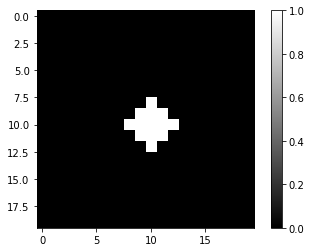

640000

In [6]:
U_0 = np.zeros((20,20),dtype="uint8")
cv2.circle(U_0,(10,10),2,1,-1)

cv2.circle(U_0,(400,400),100,0,-1)
plt.imshow(U_0,cmap="gray")
plt.colorbar()
plt.show()
np.size(mask)

# U_0

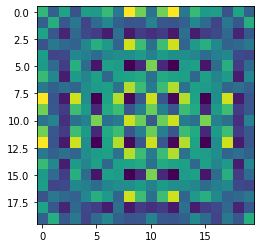

In [7]:
plt.imshow(np.abs(AngFT(U_0,0.1*mm,1*um,1*um,650*nm)))
plt.show()